# Project: Predict Prospective Student Graduate Admission into University
# Author: Robert Zacchigna

# Table of Contents

* [Problem Statement](#Problem_Statement)
* [Proposal](#Proposal)
* [Dataset - Graduate Admissions](#Dataset)
    * [Download Location](#Download_Location)
    * [Columns (Higher is better for "Scores" and "Ranks")](#Columns)
* [Imports](#Imports)


* **[Part 1: Exploratory Data Analysis and Data Preprocessing](#Part_1)**
    * [Step 1: Loading the Dataset](#Part_1-Step_1)
    * [Step 2: Display the dimensions, head of the data and drop unneeded column(s)](#Part_1-Step_2)
    * [Step 3: Split the data into train and test sets](#Part_1-Step_3)
    * [Step 4: Remove outliers from the data](#Part_1-Step_4)
    * [Step 5: Describe the data and look at summary information using Pandas Profiling](#Part_1-Step_5)
    * [Step 6: Histograms of variables in the dataset](#Part_1-Step_6)
    * [Step 7: Using Parallel Coordinates visualization to compare the distributions of numerical variables between prospective students that had research experience and those that did not.](#Part_1-Step_7)
    * [Part 1 Conclusion](#Part_1-Conclusion)


* **[Part 2: Data Dimensionality and Feature Reduction](#Part_2)**
    * [Step 1: Use Principal Component Analysis (PCA) to analyze, explore, and reduce features in the dataset.](#Part_2-Step_1)
    * [Step 2: Determine the optimal number of components for the dataset](#Part_2-Step_2)
    * [Step 3: Use SelectKbest to analyze, explore, and reduce features in the dataset](#Part_2-Step_3)
    * [Step 4: Determine the optimal number of SelectKbest features for the dataset](#Part_2-Step_4)
    * [Part 2 Conclusion](#Part_2-Conclusion)
    
    
* **[Part 3: Model Evaluation and Selection](#Part_3)**
    * [Hyperparameter Selection Methodology for Each Model](#Part_3-Hyper_Param)
    * [Step 1: Create function to calculate Adjusted R squared](#Part_3-Step_1)
    * [Step 2: Conduct Linear Regression Modeling](#Part_3-Step_2)
    * [Step 3: Conduct Linear Regression Modeling with PCA Feature Reduction](#Part_3-Step_3)
    * [Step 4: Conduct Random Forest Regression Modeling](#Part_3-Step_4)
    * [Step 5: Conduct Random Forest Regression Modeling with PCA Feature Reduction](#Part_3-Step_5)
    * [Step 6: Conduct K-Nearest Neighbor Regression Modeling](#Part_3-Step_6)
    * [Step 7: Conduct K-Nearest Neighbor Regression Modeling with PCA Feature Reduction](#Part_3-Step_7)
    * [Step 8: Conduct Decision Tree Regression Modeling](#Part_3-Step_8)
    * [Step 9: Conduct Decision Tree Regression Modeling with PCA Feature Reduction](#Part_3-Step_9)
    * [Step 10: Compare Adjusted R Squared Values of All the Models](#Part_3-Step_10)
    * [Part 3 Conclusion](#Part_3-Conclusion)


* **[Part 4: Best Model Prediction Evaluation and Constructing the Final Model](#Part_4)**
    * [Step 1: Display the best parameters found for the Random Forest model](#Part_4-Step_1)
    * [Step 2: Conduct modeling of the best Random Forest model](#Part_4-Step_2)
    * [Step 3: Use the model to predict the chances of admission values using the test ("unseen") data](#Part_4-Step_3)
    * [Step 4: Construct the final model using the entirety of the dataset](#Part_4-Step_4)
    * [Part 4 Conclusion](#Part_4-Conclusion)

<a id='Problem_Statement'></a>
## Problem Statement:

There are a lot of universities that offer the same graduate program but it can be difficult for prospective students to determine which university program they would most likely be admitted into. A prospective student being able to determine which university they would most likely be admitted into (given their scores) would save them both time from filling and sending out applications and money, since there is usually a cost/fee associated with putting in an application to the university itself. This will not only make the application process faster but also help alleviate some of the financial burden for prospective students when looking for graduate programs.

<a id='Proposal'></a>
## Proposal:

With this Graduate Admissions data set I will evaluate the performance of multiple models to determine which one performs the best given with the data. This will be a supervised learning problem and the models I will be using to evaluate this data is: Linear Regression, Random Forest, K-Nearest Neighbor (regression), and Decision Tree. I think it is important to utilize various different type of models so as to not limit the tools available to oneself for analysis. These models will be utilized through the scikit-learn implementations. 

To ensure that the data will not have any data points that would otherwise skew the models in any particular way, i will be removing all records that have data that is more than three standard deviations away from the mean before i start my modeling. I will also be checking the predicted value from the models to make sure that they fall within the valid range (0 to 1), any value that does not fall within that range will be converted to be within the proper range. Meaning, values larger than 1 will be changed to 1 and values smaller than 0 will be changed to 0.

First, I will determine how the different models perform with the data by splitting the dataset into training and testing sets and using the training set for my initial model analysis. The testing set will be treated as "unseen" future data to be used to evaluate the best model i select from my analysis. I will evaluate the performance of each model using the adjusted R squared value, where the closer to one the better the model is. I will be using k fold cross validation to check to see if my models are under or over fitting my data and make changes accordingly.

Second, after determining which model performs the best with the data, I will then use that model to predict the chance of admission into the graduate program using the "unseen" test data to see how it performs. The model prediction performance will also be evaluated used adjusted R squared, where the closer to one the better the predictions are.

<a id='Dataset'></a>
## Dataset - Graduate Admissions

For my data set, I will be using a U.S. graduate admission data set that contains criteria that is used to determine if a student will be admitted into a U.S. graduate program or not. 

<ins>Download Location:</ins> https://www.kaggle.com/mohansacharya/graduate-admissions <a id='Download_Location'></a>

<ins>Columns (Higher is better for "Scores" and "Ranks"):</ins> <a id='Columns'></a>
* __Serial No.__ - 1 to 500
* __GRE Score__ - Out of 340
* __TOEFL Score__ - Out of 120
* __University Rating__ - 1 to 5
* __SOP__ - Statement of Purpose Strength (1 to 5)
* __LOR__ - Letter of Recommendation Strength (1 to 5)
* __CGPA__ - Undergraduate GPA (1 to 10)
* __Research__ - Research Experience (either 0 or 1)
* __Chance of Admit__ - Decimal ranging from 0 to 1

<a id='Imports'></a>
## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import pandas_profiling as pp

# scipy Libraries
from scipy.stats import norm, stats
from scipy import __version__ as scipv

# matplotlib Libraries
import matplotlib.pyplot as plt
from matplotlib import __version__ as mpv

# yellowbrick Libraries
from yellowbrick import __version__ as yb
from yellowbrick.style import set_palette
from yellowbrick.features import ParallelCoordinates

# sklearn Libraries
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import __version__ as skv
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Library Versions
print('Using version %s of scipy' % scipv)
print('Using version %s of pandas' % pd.__version__)
print('Using version %s of numpy' % np.__version__)
print('Using version %s of sklearn' % skv)
print('Using version %s of seaborn' % sb.__version__)
print('Using version %s of yellowbrick' % yb)
print('Using version %s of matplotlib' % mpv)
print('Using version %s of pandas_profiling' % pp.__version__)

Using version 1.4.1 of scipy
Using version 1.1.2 of pandas
Using version 1.18.4 of numpy
Using version 0.23.2 of sklearn
Using version 0.10.1 of seaborn
Using version 1.1 of yellowbrick
Using version 3.2.1 of matplotlib
Using version 2.9.0 of pandas_profiling


<a id='Part_1'></a>
# Part 1: Exploratory Data Analysis and Data Preprocessing

<a id='Part_1-Step_1'></a>
## Step 1: Loading the Dataset

In [3]:
gradData = pd.read_csv('Graduate_Admission_Data/Admission_Predict_Ver1.1.csv')

<a id='Part_1-Step_2'></a>
## Step 2: Display the dimensions, head of the data and drop unneeded column(s)

In [4]:
print("The dimension of the table is: {:,} by {:,}".format(gradData.shape[0], gradData.shape[1]))

The dimension of the table is: 500 by 9


In [5]:
gradData.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65

### Drop unneeded column - "Serial No."

The "Serial No." column is being dropped because it provides no additional student information that each row represents. It simply appears to be a re-index of each row in the dataset, made redundant by the dataframe index itself.

In [5]:
gradData.drop('Serial No.', axis='columns', inplace=True)

gradData.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65

<a id='Part_1-Step_3'></a>
## Step 3: Split the data into train and test sets

In [6]:
seed = 74 # Seed for train/test split reproduction

x_train, x_test, y_train, y_test = train_test_split(gradData[gradData.columns[:-1]],
                                                    gradData['Chance of Admit'],
                                                    train_size=0.70,
                                                    random_state=seed)

In [6]:
print('x_train head:')

x_train.head()

x_train head:


GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
405        302           99                  3  2.5   3.0  7.45         0
488        322          112                  3  3.0   4.0  8.62         1
236        325          112                  4  4.0   4.5  9.17         1
279        304          102                  2  3.0   4.0  8.73         0
456        299          100                  2  2.0   2.0  7.88         0

In [7]:
print('y_train head:')

y_train.head()

y_train head:


405    0.52
488    0.76
236    0.85
279    0.67
456    0.51
Name: Chance of Admit, dtype: float64

<a id='Part_1-Step_4'></a>
## Step 4: Remove outliers from the data

In [7]:
before = x_train.shape[0]
print('x_train set:\n\nData size before outlier removal: {:,}'.format(before))

# Removes all records in the dataset that has data that is more than
# three standard deviations away from the mean of each column
x_train = x_train[(np.abs(stats.zscore(x_train)) < 3).all(axis=1)]

after = x_train.shape[0]
print(' Data size after outlier removal: {:,}\n\t   Total records removed: {:,}'.format(after, before - after))

x_train set:

Data size before outlier removal: 350
 Data size after outlier removal: 350
	   Total records removed: 0


In [8]:
before = y_train.shape[0]
print('y_train set:\n\nData size before outlier removal: {:,}'.format(before))

# Removes all records in the dataset that has data that is more than
# three standard deviations away from the mean of each column
y_train = y_train[(np.abs(stats.zscore(y_train)) < 3)]

after = y_train.shape[0]
print(' Data size after outlier removal: {:,}\n\t   Total records removed: {:,}'.format(after, before - after))

y_train set:

Data size before outlier removal: 350
 Data size after outlier removal: 350
	   Total records removed: 0


From the output above we can see that all the data is within three standard deviations of the mean of each of the columns and thus no data was removed from the dataset

<a id='Part_1-Step_5'></a>
## Step 5: Describe the data and look at summary information using Pandas Profiling

In [23]:
print("Describe Data: x_train")

x_train.describe()

Describe Data: x_train


GRE Score  TOEFL Score  University Rating         SOP        LOR   \
count  350.000000   350.000000         350.000000  350.000000  350.000000   
mean   316.560000   107.288571           3.134286    3.400000    3.470000   
std     11.417606     6.190818           1.153900    1.009979    0.923949   
min    290.000000    92.000000           1.000000    1.000000    1.000000   
25%    308.000000   103.000000           2.000000    2.500000    3.000000   
50%    317.000000   107.000000           3.000000    3.500000    3.500000   
75%    325.000000   112.000000           4.000000    4.000000    4.000000   
max    340.000000   120.000000           5.000000    5.000000    5.000000   

             CGPA    Research  
count  350.000000  350.000000  
mean     8.572657    0.568571  
std      0.609289    0.495985  
min      6.800000    0.000000  
25%      8.120000    0.000000  
50%      8.560000    1.000000  
75%      9.060000    1.000000  
max      9.920000    1.000000

In [24]:
print("Describe Data: y_train")

y_train.describe()

Describe Data: y_train


count    350.000000
mean       0.722600
std        0.142031
min        0.340000
25%        0.630000
50%        0.720000
75%        0.830000
max        0.970000
Name: Chance of Admit, dtype: float64

### Pandas Profiling of Graduate Admissions data: Summary Information, Correlation Matrices, and Missing Value Information.

In [33]:
print('x_train profiling: ')

pp.ProfileReport(x_train).to_notebook_iframe()

x_train profiling: 


In [34]:
print('y_train profiling: ')

pp.ProfileReport(y_train).to_notebook_iframe()

y_train profiling: 


### Annotated Correlation Matrix

Text(0.5, 1.0, 'Annotated Correlation Matrix')

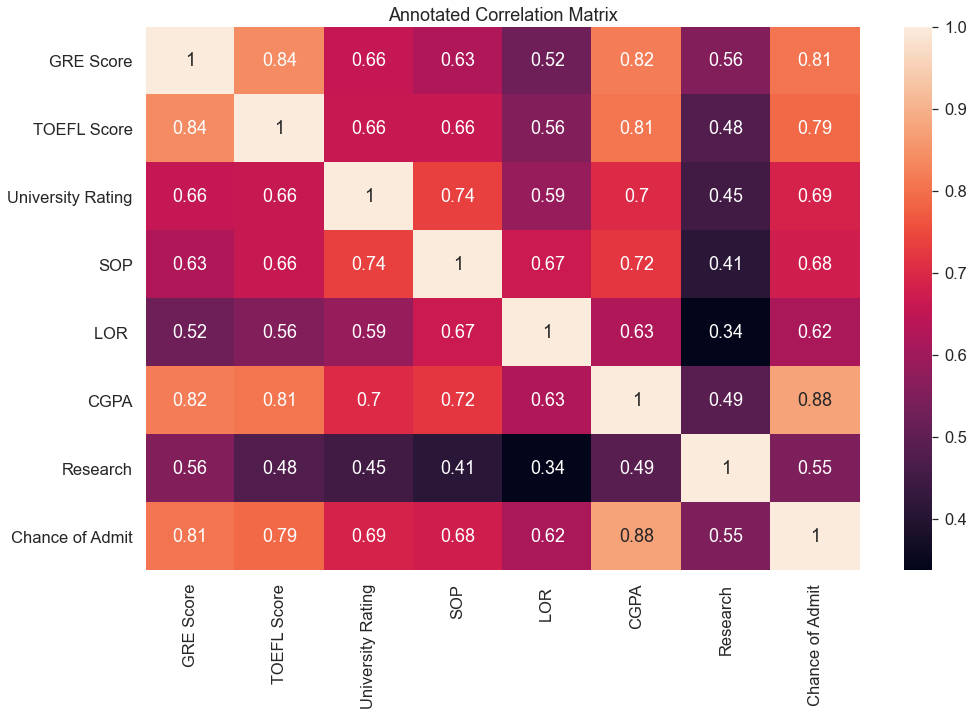

In [53]:
plt.rcParams['figure.figsize'] = (16, 10)

sb.set(font_scale = 1.5)
sb.set_style(style='white')

sb.heatmap(x_train.merge(y_train, left_index=True, right_index=True).corr(), 
           annot = True).set_title('Annotated Correlation Matrix')

From the Pandas Profiling report, we can see that there is no missing data, there is 7 numeric variables and 1 categorical variable (Research) and that there are some strong correlations between several variables: Chance of Admit and CGPA, CGPA and GRE Score, TOEFL Score and GRE Score, TOEFL and Chance of Admit. These variable correlations are made clearer with the annotated correlation matrix above.

<a id='Part_1-Step_6'></a>
## Step 6: Histograms of variables in the dataset

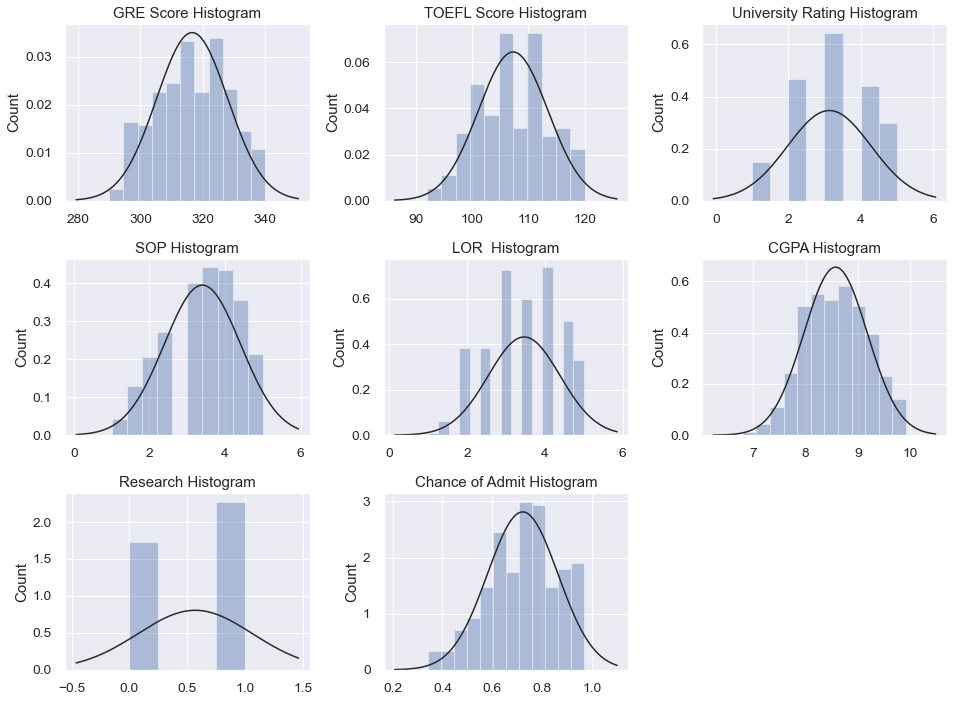

In [52]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.5)
fig.set_size_inches(13.5, 10)
sb.set(font_scale = 1.25)

hists = x_train.merge(y_train, left_index=True, right_index=True)

i = 1
for var in hists.columns:
    fig.add_subplot(3, 3, i)
    sb.distplot(pd.Series(hists[var], name=''),
                fit=norm, kde=False).set_title(var + " Histogram")
    plt.ylabel('Count')
    
    i += 1

fig.tight_layout()

<a id='Part_1-Step_7'></a>
## Step 7: Using Parallel Coordinates visualization to compare the distributions of numerical variables between prospective students that had research experience and those that did not.

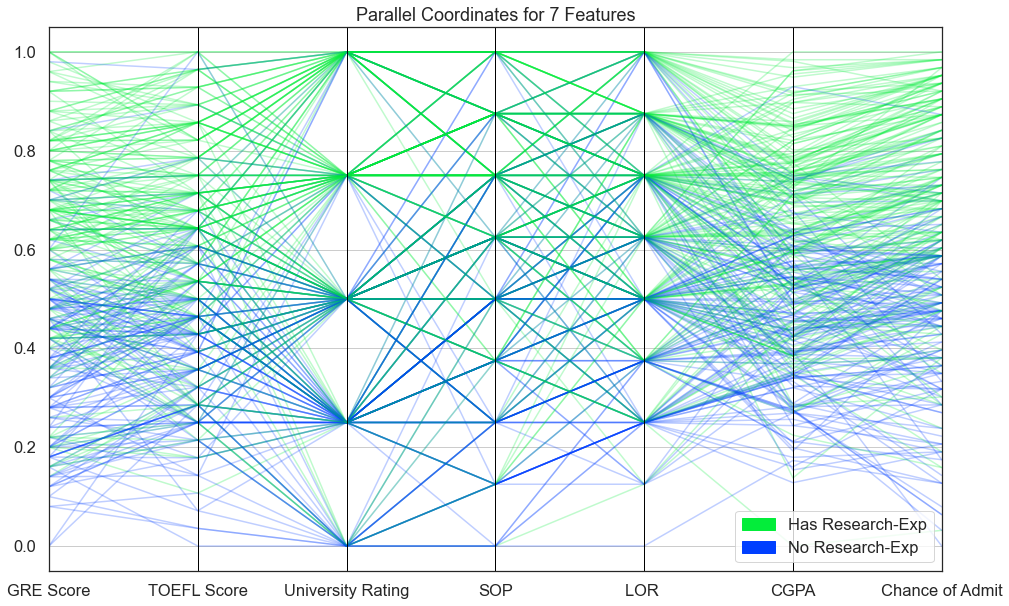

In [54]:
plt.rcParams['figure.figsize'] = (16, 10)
sb.set(font_scale = 1.5)
sb.set_style(style='white')

set_palette('sns_bright')

paraGridValues = x_train.merge(y_train, left_index=True, right_index=True)

classes = ['No Research-Exp', 'Has Research-Exp']
columns = paraGridValues.columns.delete(6) # Remove the "Research" column

paraGridValuesNorm = paraGridValues.copy()

for col in columns:
    paraGridValuesNorm[col] = ((paraGridValues[col] - paraGridValues[col].min()) / 
                               (paraGridValues[col].max() - paraGridValues[col].min()))

parrCorrData = ParallelCoordinates(classes=classes, features=columns)

parrCorrData.fit_transform(paraGridValuesNorm[columns], paraGridValues['Research'])
parrCorrData.poof()

From the Parallel Coordinate Graph above, we can see that (overall) prospective students that had research experience had higher scores in each variable category (including admission chance) than those that did not have any research experience. 

Thus, judging from the graph above, it is evident that students that have research experience are generally perceived to be better performers academically and have higher chances of being admitted into their graduate program.

<a id='Part_1-Conclusion'></a>
## Part 1 Conclusion:

Based on the preprocessing and analysis above, i can see that the data has no missing or duplicated values which would need to be accounted for in the later analysis. There are some strong correlations between several of the variables in the dataset and there also was no outlying data points that were found that would have needed to be removed in order to be prevent those data points from skewing analysis results.

<a id='Part_2'></a>
# Part 2: Data Dimensionality and Feature Reduction

<a id='Part_2-Step_1'></a>
## Step 1: Use Principal Component Analysis (PCA) to analyze, explore, and reduce features in the dataset.

In [6]:
features = x_train.values
target = y_train.values

pca = PCA(n_components=len(features[0]))
scaler = StandardScaler()

scaledFeatures = scaler.fit_transform(features)

featurePCA = pca.fit_transform(scaledFeatures, target)

featurePCA_df = pd.DataFrame(featurePCA, columns=['PC_{}'.format(x) for x in range(1, len(featurePCA[0]) + 1)])

print('Features: ', end="") 
print(', '.join([col for col in x_train.columns]))
print('  Target: ' + str(y_train.name))
print('\nDataframe of PCA values:')

featurePCA_df.head()

Features: GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research
  Target: Chance of Admit

Dataframe of PCA values:


PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7
0  2.724586 -0.736798  0.495703  0.586150  0.626320  0.442342  0.277726
1 -0.781468  0.713835  0.104672 -0.789127  0.357994  0.412840 -0.147279
2 -2.169545  0.062083  0.335654 -0.352875  0.193790 -0.128895 -0.118879
3  1.349982 -1.204041  0.154751 -0.846652 -0.207078 -0.752895 -0.404829
4  3.367449  0.018635 -0.361621  0.432390  0.091393 -0.143489 -0.352107

### This dataframe contains information about how each principal component relates to each of the features
#### The values are a correlation scale from -1 to 1

In [7]:
pd.DataFrame(pca.components_, columns=x_train.columns,
             index=['PC_{}'.format(x) for x in range(1, len(pca.components_) + 1)])

GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
PC_1  -0.405187    -0.404952          -0.385193 -0.387670 -0.341778 -0.417656   
PC_2   0.234378     0.083692          -0.156981 -0.316707 -0.474979 -0.006363   
PC_3  -0.394430    -0.445112           0.131029  0.207506  0.454035 -0.255263   
PC_4  -0.141750    -0.142154           0.677392  0.327790 -0.614125 -0.117856   
PC_5   0.104552    -0.009502           0.590798 -0.745631  0.258744 -0.116538   
PC_6  -0.003087     0.609929          -0.006162  0.130912  0.070012 -0.778022   
PC_7   0.770896    -0.488440          -0.043286  0.160622  0.049341 -0.357175   

      Research  
PC_1 -0.286226  
PC_2  0.766466  
PC_3  0.561041  
PC_4 -0.048502  
PC_5 -0.058653  
PC_6  0.024104  
PC_7 -0.097284

### Find overall Principal Component values 
#### The higher the component percentage, the more the data is explained by that component.

In [14]:
for index, val in enumerate(pca.explained_variance_ratio_):
    print('Principal Component {}: {:>6}%'.format(index + 1, round(val * 100, 3)))

Principal Component 1: 67.785%
Principal Component 2: 10.658%
Principal Component 3:  7.704%
Principal Component 4:  5.613%
Principal Component 5:  3.592%
Principal Component 6:  2.594%
Principal Component 7:  2.055%


<a id='Part_2-Step_2'></a>
## Step 2: Determine the optimal number of PCA components for the dataset

### The annotated graph below plots the cumulative sum of variances of the principal components

Text(0.5, 1.0, 'Explained Variance')

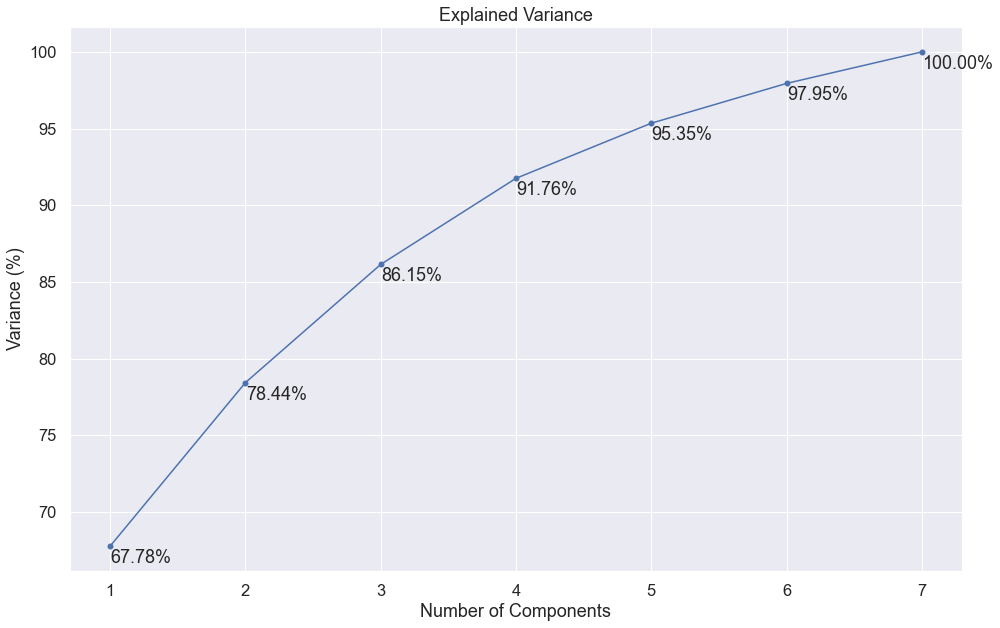

In [9]:
plt.rcParams['figure.figsize'] = (16, 10)
sb.set(font_scale = 1.5)

cumSum = np.cumsum(pca.explained_variance_ratio_) * 100

plt.plot(cumSum, marker='o')
plt.xticks(range(0, len(cumSum)), range(1, 8))

for x, y in zip(range(1, 8), cumSum):
    plt.annotate("{:.2f}%".format(y), (x, y), xytext=(-135, -17), 
                 textcoords="offset points", annotation_clip = False)

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')

Based on the graph above of the principal components of the dataset and given the overall size of the data, i do not believe that utilizing any of the components for feature reduction in my data will provide any significant benefit to the analysis. While the above graph shows that i could use either 5 or 6 components to explain roughly 95-98% of the overall data, my prediction is that because my dataset is so small, with already few variables, there is not (in my opinion) a large enough benefit to warrant the utilization of feature reduction techniques for this dataset (in this case specifically PCA). This prediction will be explored in Part 3 of the analysis to determine if I was correct or not and make changes accordingly.

<a id='Part_2-Step_3'></a>
## Step 3: Use SelectKbest to analyze, explore, and reduce features in the dataset

In [12]:
features = x_train.values
target = y_train.values

k = len(x_train.columns) # 7 
skb = SelectKBest(score_func=f_regression, k=k)

scaler = StandardScaler()
scaledFeatures = scaler.fit_transform(features)

fit = skb.fit(scaledFeatures, target)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x_train.columns)

feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature_Name', 'Score']

print('SelectKBest\n===========\nk = ' + str(k) + 
      '\nScoring Method: f_regression\n\nDataframe of the SelectKBest scores per feature:')
feature_scores.nlargest(k, 'Score')

SelectKBest
k = 7
Scoring Method: f_regression

Dataframe of the SelectKBest scores per feature:


Feature_Name        Score
5               CGPA  1173.701403
0          GRE Score   654.127463
1        TOEFL Score   588.422130
2  University Rating   311.144128
3                SOP   296.161647
4               LOR    212.798879
6           Research   149.035658

<a id='Part_2-Step_4'></a>
## Step 4: Determine the optimal number of SelectKbest features for the dataset

Text(0.5, 1.0, 'Bar Graph of SelectKBest Scores from Largest to Smallest')

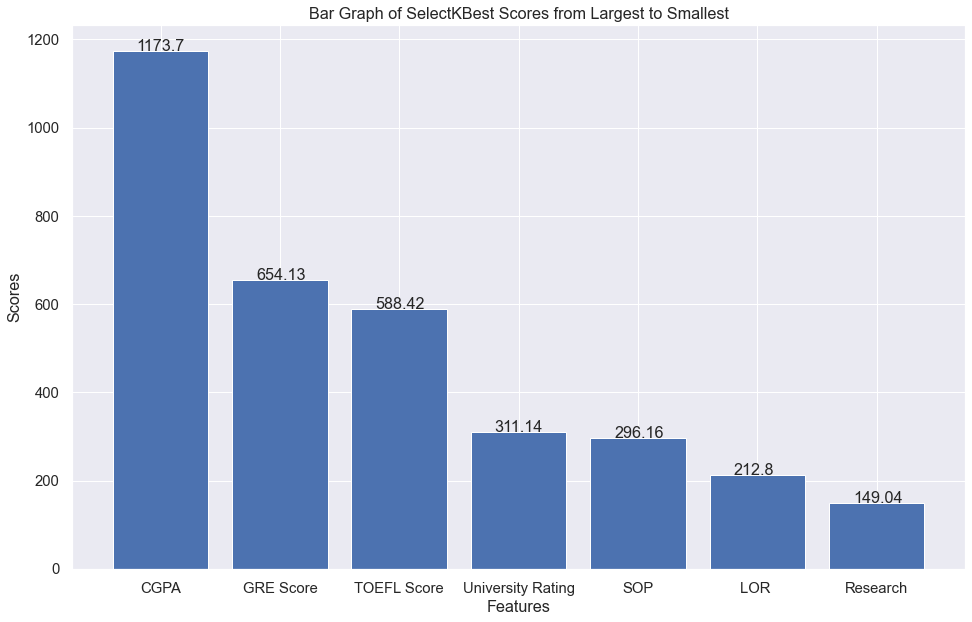

In [13]:
plt.rcParams['figure.figsize'] = (16, 10)
sb.set(font_scale = 1.35)

barPlot = feature_scores.nlargest(k, 'Score')
plt.bar(barPlot['Feature_Name'], barPlot['Score'])

for index, value in enumerate(barPlot['Score']):
    plt.text(index - 0.2, value, str(round(value, 2)))

plt.ylabel('Scores')
plt.xlabel('Features')
plt.title('Bar Graph of SelectKBest Scores from Largest to Smallest')

Based on the graph above and according to SelectKBest, the best features to use in my analysis would be CGPA (most important feature, the highest score), GRE Score, and TOEFL Score (the higher the SelectKBest Score, the more important it is). Those three features seem to be the important features to use in my analysis, while the remaining 4 features don't seem to have as large of an impact in the data given their much lower SelectKBest scores (with Research having the smallest impact).

<a id='Part_2-Conclusion'></a>
## Part 2 Conclusion:

Overall, I predict that the estimated computational savings would be marginal at best when conducting model analysis with or without these feature reductions. However, it is possible that utilizing certain features over others could also make my models perform better than they would without them. Thus, in Part 3 of this analysis, i will explore my predictions about these features to see whether or not i was correct and utilize the feature reductions accordingly.

<a id='Part_3'></a>
# Part 3: Model Evaluation and Selection

I will be conducting regression modeling on all 4 of the models i outlined in the [proposal](#Proposal) (Linear Regression, Random Forest, K-Nearest Neighbor, and Decision Tree) with and without PCA feature reduction to see if there is or is not any improvements in the performance of the models. 

Based on the explained variance graph of the PCA components (from [Part 2, Step 2](#Part_2-Step_2)), i will be using only 5 of the 7 components for the feature reduction because the first 5 components explains roughly 95% of the values in the dataset. 

The adjusted R squared scores of all the models (both with and without feature reduction) will be compared at the end to determine which model performed the best and thus the model that did perform the best, will be the model that is used to predict future graduate admissions chances.

<a id='Part_3-Hyper_Param'></a>
## Hyperparameter Selection Methodology for Each Model

For the hyperparameter selection of each model, the methodology i went with for deciding what parameters should be used in each GridSearchCV was to mainly focus on the different types of algorithms available per model and the growth of the model itself (more applicable to Knn, Random Forest and Decision tree). I took a look at the sklearn documentation and looked at all the parameters outlined for each model to it to determine which ones applied to my criteria. I felt that those parameters applicable to each model were the most important in helping to effectively determine the best parameters possible for each model. While fine tuning using each and every parameter available for each model would be ideal, i felt that this would take too much time to fine tune them all and might not be the best use of my time because, in my opinion, not all of the parameters available are as important as others (thus, comparatively, not worth the time).

<a id='Part_3-Step_1'></a>
## Step 1: Create function to calculate Adjusted R squared

In [9]:
def adjusted_R_squared(estimator, x, y):
    # estimator.score(x, y) returns the r squared of the model
    return round(1 - (1 - estimator.score(x, y)) * ((x.shape[0] - 1) / (x.shape[0] - x.shape[1] - 1)), 5)

<a id='Part_3-Step_2'></a>
## Step 2: Conduct Linear Regression Modeling

### Create pipeline for scaling and running linear regression on the data

In [9]:
lr_pipe = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('lr', LinearRegression())
]))

### Setup parameters for the linear regression model to be tested by GridSearchCV

In [10]:
param_grid = {'lr__fit_intercept': [True, False],
              'lr__normalize': [True, False]}

lr_grid = GridSearchCV(lr_pipe, scoring=adjusted_R_squared, 
                       param_grid = param_grid, cv = 5, n_jobs = -1, verbose=2)

### Fit the data to the linear regression grid to find the best parameters for the linear regression model

In [11]:
lr_grid.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    4.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.8s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('lr', LinearRegression())]),
             n_jobs=-1,
             param_grid={'lr__fit_intercept': [True, False],
                         'lr__normalize': [True, False]},
             scoring=<function adjusted_R_squared at 0x0000020E088C15E0>,
             verbose=2)

### Display top adjusted R squared scores found by the GridSearchCV

In [12]:
lr_df = pd.DataFrame(lr_grid.cv_results_).sort_values('mean_test_score', 
                                                      ascending=False)[['params', 'mean_test_score']].head(10)
lr_df

params  mean_test_score
0  {'lr__fit_intercept': True, 'lr__normalize': T...         0.777480
1  {'lr__fit_intercept': True, 'lr__normalize': F...         0.777480
2  {'lr__fit_intercept': False, 'lr__normalize': ...       -28.755858
3  {'lr__fit_intercept': False, 'lr__normalize': ...       -28.755858

### Based off the dataframe above, display the best params and score for the linear regression model

In [13]:
print('Best Linear Regression Parameters\n=================================')

for name, val in lr_df.iloc[0]['params'].items():
    print('{:>19}: {}'.format(name.replace('lr__', ''), val))
    
lr_adjR2 = lr_df.iloc[0]['mean_test_score']
print('\nAjusted R Squared: {}'.format(round(lr_adjR2, 4)))

Best Linear Regression Parameters
      fit_intercept: True
          normalize: True

Ajusted R Squared: 0.7775


<a id='Part_3-Step_3'></a>
## Step 3: Conduct Linear Regression Modeling with PCA Feature Reduction

### Create pipeline for scaling, conducting PCA, and running linear regression on the data

In [14]:
lr_pipe_pca = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=5)), # Only using 5 components as outlined in the beginning of Part 3
    ('lr', LinearRegression())
]))

### Setup parameters for the random forest model to be tested by GridSearchCV

In [15]:
param_grid = {'lr__fit_intercept': [True, False],
              'lr__normalize': [True, False]}

lr_grid_pca = GridSearchCV(lr_pipe_pca, scoring=adjusted_R_squared, 
                           param_grid = param_grid, cv = 5, n_jobs = -1, verbose=2)

### Fit the data to the linear regression grid to find the best parameters for the linear regression model

In [16]:
lr_grid_pca.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('lr', LinearRegression())]),
             n_jobs=-1,
             param_grid={'lr__fit_intercept': [True, False],
                         'lr__normalize': [True, False]},
             scoring=<function adjusted_R_squared at 0x0000020E088C15E0>,
             verbose=2)

### Display top adjusted R squared scores found by the GridSearchCV

In [17]:
lr_df_pca = pd.DataFrame(lr_grid_pca.cv_results_).sort_values('mean_test_score',
                                                              ascending=False)[['params', 'mean_test_score']].head(10)
lr_df_pca

params  mean_test_score
0  {'lr__fit_intercept': True, 'lr__normalize': T...         0.750908
1  {'lr__fit_intercept': True, 'lr__normalize': F...         0.750908
2  {'lr__fit_intercept': False, 'lr__normalize': ...       -28.799316
3  {'lr__fit_intercept': False, 'lr__normalize': ...       -28.799316

### Based off the dataframe above, display the best params and score for the linear regression model

In [18]:
print('Best Linear Regression Parameters\n=================================')

for name, val in lr_df_pca.iloc[0]['params'].items():
    print('{:>19}: {}'.format(name.replace('lr__', ''), val))
    
lr_adjR2_pca = lr_df_pca.iloc[0]['mean_test_score']
print('\nAjusted R Squared: {}'.format(round(lr_adjR2_pca, 4)))

Best Linear Regression Parameters
      fit_intercept: True
          normalize: True

Ajusted R Squared: 0.7509


<a id='Part_3-Step_4'></a>
## Step 4: Conduct Random Forest Regression Modeling

### Create pipeline for scaling  and running random forest regression on the data

In [39]:
rf_pipe = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=seed))
]))

### Setup parameters for the random forest model to be tested by GridSearchCV

In [40]:
param_grid = {'rf__max_depth': np.arange(2, 12, 2),
              'rf__max_features': ['auto', 'sqrt', 'log2'],
              'rf__min_samples_leaf': [1, 2, 4],
              'rf__min_samples_split': [2, 5, 10],
              'rf__n_estimators': np.append(100, np.arange(200, 1200, 200))}

rf_grid = GridSearchCV(rf_pipe, scoring=adjusted_R_squared,
                       param_grid = param_grid, cv = 5, n_jobs = -1, verbose=2)

### Fit the data to the random forest grid to find the best parameters for the random forest regression

In [41]:
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 4050 out of 4050 | elapsed: 15.1min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('rf',
                                        RandomForestRegressor(random_state=74))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': array([ 2,  4,  6,  8, 10]),
                         'rf__max_features': ['auto', 'sqrt', 'log2'],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': array([ 100,  200,  400,  600,  800, 1000])},
             scoring=<function adjusted_R_squared at 0x000001C5465489D0>,
             verbose=2)

### Display top adjusted R squared scores found by the GridSearchCV

In [42]:
rf_df = pd.DataFrame(rf_grid.cv_results_).sort_values('mean_test_score',
                                                      ascending=False)[['params', 'mean_test_score']].head(10)
rf_df

params  mean_test_score
443  {'rf__max_depth': 6, 'rf__max_features': 'log2...         0.780162
389  {'rf__max_depth': 6, 'rf__max_features': 'sqrt...         0.780162
386  {'rf__max_depth': 6, 'rf__max_features': 'sqrt...         0.779992
440  {'rf__max_depth': 6, 'rf__max_features': 'log2...         0.779992
401  {'rf__max_depth': 6, 'rf__max_features': 'sqrt...         0.779910
455  {'rf__max_depth': 6, 'rf__max_features': 'log2...         0.779910
554  {'rf__max_depth': 8, 'rf__max_features': 'sqrt...         0.779670
608  {'rf__max_depth': 8, 'rf__max_features': 'log2...         0.779670
388  {'rf__max_depth': 6, 'rf__max_features': 'sqrt...         0.779614
442  {'rf__max_depth': 6, 'rf__max_features': 'log2...         0.779614

### Based off the dataframe above, display the best params and score for the random forest model

In [23]:
print('Best Random Forest Regression Parameters\n========================================')

for name, val in rf_df.iloc[0]['params'].items():
    print('{:>24}: {}'.format(name.replace('rf__', ''), val))
    
rf_adjR2 = rf_df.iloc[0]['mean_test_score']
print('\nAjusted R Squared: {}'.format(round(rf_adjR2, 4)))

Best Random Forest Regression Parameters
               max_depth: 6
            max_features: log2
        min_samples_leaf: 1
       min_samples_split: 5
            n_estimators: 1000

Ajusted R Squared: 0.7802


<a id='Part_3-Step_5'></a>
## Step 5: Conduct Random Forest Regression Modeling with PCA Feature Reduction

### Create pipeline for scaling, conducting PCA, and running random forest regression on the data

In [24]:
rf_pipe_pca = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=5)), # Only using 5 components as outlined in the beginning of Part 3
    ('rf', RandomForestRegressor(random_state=seed))
]))

### Setup parameters for the random forest model to be tested by GridSearchCV

In [25]:
param_grid = {'rf__max_depth': np.arange(2, 12, 2),
              'rf__max_features': ['auto', 'sqrt', 'log2'],
              'rf__min_samples_leaf': [1, 2, 4],
              'rf__min_samples_split': [2, 5, 10],
              'rf__n_estimators': np.append(100, np.arange(200, 1200, 200))}

rf_grid_pca = GridSearchCV(rf_pipe_pca, scoring=adjusted_R_squared, 
                           param_grid = param_grid, cv = 5, n_jobs = -1, verbose=2)

### Fit the data to the random forest grid to find the best parameters for the random forest regression

In [26]:
rf_grid_pca.fit(x_train, y_train)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 4050 out of 4050 | elapsed: 15.1min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('rf',
                                        RandomForestRegressor(random_state=74))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': array([ 2,  4,  6,  8, 10]),
                         'rf__max_features': ['auto', 'sqrt', 'log2'],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': array([ 100,  200,  400,  600,  800, 1000])},
             scoring=<function adjusted_R_squared at 0x0000020E088C15E0>,
             verbose=2)

### Display top adjusted R squared scores found by the GridSearchCV

In [27]:
rf_df_pca = pd.DataFrame(rf_grid_pca.cv_results_).sort_values('mean_test_score',
                                                              ascending=False)[['params', 'mean_test_score']].head(10)
rf_df_pca

params  mean_test_score
337  {'rf__max_depth': 6, 'rf__max_features': 'auto...         0.738518
338  {'rf__max_depth': 6, 'rf__max_features': 'auto...         0.738028
325  {'rf__max_depth': 6, 'rf__max_features': 'auto...         0.737788
331  {'rf__max_depth': 6, 'rf__max_features': 'auto...         0.737484
326  {'rf__max_depth': 6, 'rf__max_features': 'auto...         0.737256
332  {'rf__max_depth': 6, 'rf__max_features': 'auto...         0.737124
372  {'rf__max_depth': 6, 'rf__max_features': 'auto...         0.736956
499  {'rf__max_depth': 8, 'rf__max_features': 'auto...         0.736788
374  {'rf__max_depth': 6, 'rf__max_features': 'auto...         0.736744
500  {'rf__max_depth': 8, 'rf__max_features': 'auto...         0.736698

### Based off the dataframe above, display the best params and score for the random forest model

In [29]:
print('Best Random Forest Regression Parameters\n========================================')

for name, val in rf_df_pca.iloc[0]['params'].items():
    print('{:>25}: {}'.format(name.replace('rf__', ''), val))
    
rf_adjR2_pca = rf_df_pca.iloc[0]['mean_test_score']
print('\nAjusted R Squared: {}'.format(round(rf_adjR2_pca, 4)))

Best Random Forest Regression Parameters
                max_depth: 6
             max_features: auto
         min_samples_leaf: 1
        min_samples_split: 10
             n_estimators: 200

Ajusted R Squared: 0.7385


<a id='Part_3-Step_6'></a>
## Step 6: Conduct K-Nearest Neighbor Regression Modeling

### Create pipeline for scaling and running knn regression on the data

In [7]:
knn_pipe = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor())
]))

### Setup parameters for the k-nearest neighbor model to be tested by GridSearchCV

In [10]:
param_grid = {'knn__n_neighbors': np.arange(1, 50, 2),
              'knn__weights': ['uniform'],
              'knn__algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'knn__leaf_size': np.arange(1, 50, 2),
              'knn__p': [1, 2]}

knn_grid = GridSearchCV(knn_pipe, refit=True, scoring=adjusted_R_squared,
                        param_grid = param_grid, cv = 5, n_jobs = -1, verbose=2)

### Fit the data to the knn grid to find the best parameters for the knn regression

In [11]:
knn_grid.fit(x_train, y_train)

Fitting 5 folds for each of 3750 candidates, totalling 18750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 2240 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 4504 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 7424 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 10984 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 15200 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 18750 out of 18750 | elapsed:  1.1min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'knn__leaf_size': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'knn__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'knn__p': [1, 2], 'knn__weights': ['uniform']},
             scoring=<function adjusted_R_squared at 0x000001C5465489D0>,
             verbose=2)

### Display top adjusted R squared scores found by the GridSearchCV

In [12]:
knn_df = pd.DataFrame(knn_grid.cv_results_).sort_values('mean_test_score',
                                                        ascending=False)[['params', 'mean_test_score']].head(100)
knn_df

params  mean_test_score
916   {'knn__algorithm': 'ball_tree', 'knn__leaf_siz...         0.751120
2466  {'knn__algorithm': 'kd_tree', 'knn__leaf_size'...         0.751120
1516  {'knn__algorithm': 'kd_tree', 'knn__leaf_size'...         0.751120
1966  {'knn__algorithm': 'kd_tree', 'knn__leaf_size'...         0.751120
2916  {'knn__algorithm': 'brute', 'knn__leaf_size': ...         0.751120
...                                                 ...              ...
2114  {'knn__algorithm': 'kd_tree', 'knn__leaf_size'...         0.750576
2414  {'knn__algorithm': 'kd_tree', 'knn__leaf_size'...         0.750576
314   {'knn__algorithm': 'ball_tree', 'knn__leaf_siz...         0.750576
3064  {'knn__algorithm': 'brute', 'knn__leaf_size': ...         0.750576
1514  {'knn__algorithm': 'kd_tree', 'knn__leaf_size'...         0.750576

[100 rows x 2 columns]

### Based off the dataframe above, display the best params and score for the knn model

In [13]:
print('Best Knn Regression Parameters\n==============================')

for name, val in knn_df.iloc[0]['params'].items():
    print('{:>15}: {}'.format(name.replace('knn__', ''), val))
    
knn_adjR2 = knn_df.iloc[0]['mean_test_score']
print('\nAjusted R Squared: {}'.format(round(knn_adjR2, 4)))

Best Knn Regression Parameters
      algorithm: ball_tree
      leaf_size: 37
    n_neighbors: 17
              p: 1
        weights: uniform

Ajusted R Squared: 0.7511


<a id='Part_3-Step_7'></a>
## Step 7: Conduct K-Nearest Neighbor Regression Modeling with PCA Feature Reduction

### Create pipeline for scaling, conducting PCA, and running knn regression on the data

In [14]:
knn_pipe_pca = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=5)), # Only using 5 components as outlined in the beginning of Part 3
    ('knn', KNeighborsRegressor())
]))

### Setup parameters for the knn model to be tested by GridSearchCV

In [15]:
param_grid = {'knn__n_neighbors': np.arange(1, 50, 2),
              'knn__weights': ['uniform'],
              'knn__algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'knn__leaf_size': np.arange(1, 50, 2),
              'knn__p': [1, 2]}

knn_grid_pca = GridSearchCV(knn_pipe_pca, scoring=adjusted_R_squared, 
                            refit=True, param_grid = param_grid, cv = 5, n_jobs = -1, verbose=2)

### Fit the data to the knn grid to find the best parameters for the knn regression

In [16]:
knn_grid_pca.fit(x_train, y_train)

Fitting 5 folds for each of 3750 candidates, totalling 18750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 896 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 4784 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 7704 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 11264 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 15480 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 18750 out of 18750 | elapsed:  1.0min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'knn__leaf_size': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'knn__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'knn__p': [1, 2], 'knn__weights': ['uniform']},
             scoring=<function adjusted_R_squared at 0x000001C5465489D0>,
             verbose=2)

### Display top adjusted R squared scores found by the GridSearchCV

In [17]:
knn_df_pca = pd.DataFrame(knn_grid_pca.cv_results_).sort_values('mean_test_score',
                                                                ascending=False)[['params', 'mean_test_score']].head(100)
knn_df_pca

params  mean_test_score
3162  {'knn__algorithm': 'brute', 'knn__leaf_size': ...         0.738612
1312  {'knn__algorithm': 'kd_tree', 'knn__leaf_size'...         0.738612
2662  {'knn__algorithm': 'brute', 'knn__leaf_size': ...         0.738612
1512  {'knn__algorithm': 'kd_tree', 'knn__leaf_size'...         0.738612
2012  {'knn__algorithm': 'kd_tree', 'knn__leaf_size'...         0.738612
...                                                 ...              ...
3664  {'knn__algorithm': 'brute', 'knn__leaf_size': ...         0.737802
2264  {'knn__algorithm': 'kd_tree', 'knn__leaf_size'...         0.737802
314   {'knn__algorithm': 'ball_tree', 'knn__leaf_siz...         0.737802
3714  {'knn__algorithm': 'brute', 'knn__leaf_size': ...         0.737802
414   {'knn__algorithm': 'ball_tree', 'knn__leaf_siz...         0.737802

[100 rows x 2 columns]

### Based off the dataframe above, display the best params and score for the knn model

In [18]:
print('Best Knn Regression Parameters\n==============================')

for name, val in knn_df_pca.iloc[0]['params'].items():
    print('{:>15}: {}'.format(name.replace('knn__', ''), val))
    
knn_adjR2_pca = knn_df_pca.iloc[0]['mean_test_score']
print('\nAjusted R Squared: {}'.format(round(knn_adjR2_pca, 4)))

Best Knn Regression Parameters
      algorithm: brute
      leaf_size: 27
    n_neighbors: 13
              p: 1
        weights: uniform

Ajusted R Squared: 0.7386


<a id='Part_3-Step_8'></a>
## Step 8: Conduct Decision Tree Regression Modeling

### Create pipeline for scaling and running decision tree regression on the data

In [19]:
dt_pipe = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('dt', DecisionTreeRegressor(random_state=seed))
]))

### Setup parameters for the decision tree model to be tested by GridSearchCV

In [20]:
param_grid = {'dt__criterion': ['mse', 'friedman_mse', 'mae'],
              'dt__splitter': ['best', 'random'],
              'dt__max_features': ['auto', 'sqrt', 'log2'],
              'dt__max_depth': np.arange(1, 20, 2),
              'dt__min_samples_leaf': [1, 2, 4],
              'dt__min_samples_split': [2, 5, 10],
              'dt__ccp_alpha': [0.0, 1.0]}

dt_grid = GridSearchCV(dt_pipe, refit=True, scoring=adjusted_R_squared,
                       param_grid = param_grid, cv = 5, n_jobs = -1, verbose=2)

### Fit the data to the decision tree grid to find the best parameters for the decision tree regression

In [21]:
dt_grid.fit(x_train, y_train)

Fitting 5 folds for each of 3240 candidates, totalling 16200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 896 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 4784 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 7704 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 11264 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 15480 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 16185 out of 16200 | elapsed:   50.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 16200 out of 16200 | elapsed:   50.3s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('dt',
                                        DecisionTreeRegressor(random_state=74))]),
             n_jobs=-1,
             param_grid={'dt__ccp_alpha': [0.0, 1.0],
                         'dt__criterion': ['mse', 'friedman_mse', 'mae'],
                         'dt__max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'dt__max_features': ['auto', 'sqrt', 'log2'],
                         'dt__min_samples_leaf': [1, 2, 4],
                         'dt__min_samples_split': [2, 5, 10],
                         'dt__splitter': ['best', 'random']},
             scoring=<function adjusted_R_squared at 0x000001C5465489D0>,
             verbose=2)

### Display top adjusted R squared scores found by the GridSearchCV

In [22]:
dt_df = pd.DataFrame(dt_grid.cv_results_).sort_values('mean_test_score',
                                                      ascending=False)[['params', 'mean_test_score']].head(10)
dt_df

params  mean_test_score
1200  {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mae',...         0.724246
1202  {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mae',...         0.724246
1204  {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mae',...         0.722186
1188  {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mae',...         0.717166
660   {'dt__ccp_alpha': 0.0, 'dt__criterion': 'fried...         0.713178
120   {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mse',...         0.713178
662   {'dt__ccp_alpha': 0.0, 'dt__criterion': 'fried...         0.713178
122   {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mse',...         0.713178
1190  {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mae',...         0.712892
1196  {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mae',...         0.712842

### Based off the dataframe above, display the best params and score for the decision tree model

In [23]:
print('Best Decision Tree Regression Parameters\n========================================')

for name, val in dt_df.iloc[0]['params'].items():
    print('{:>23}: {}'.format(name.replace('dt__', ''), val))
    
dt_adjR2 = dt_df.iloc[0]['mean_test_score']
print('\nAjusted R Squared: {}'.format(round(dt_adjR2, 4)))

Best Decision Tree Regression Parameters
              ccp_alpha: 0.0
              criterion: mae
              max_depth: 5
           max_features: auto
       min_samples_leaf: 4
      min_samples_split: 2
               splitter: best

Ajusted R Squared: 0.7242


<a id='Part_3-Step_9'></a>
## Step 9: Conduct Decision Tree Regression Modeling with PCA Feature Reduction

### Create pipeline for scaling, conducting PCA, and running decision tree regression on the data

In [24]:
dt_pipe_pca = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=5)), # Only using 5 components as outlined in the beginning of Part 3
    ('dt', DecisionTreeRegressor(random_state=seed))
]))

### Setup parameters for the decision tree model to be tested by GridSearchCV

In [25]:
param_grid = {'dt__criterion': ['mse', 'friedman_mse', 'mae'],
              'dt__splitter': ['best', 'random'],
              'dt__max_features': ['auto', 'sqrt', 'log2'],
              'dt__max_depth': np.arange(1, 20, 2),
              'dt__min_samples_leaf': [1, 2, 4],
              'dt__min_samples_split': [2, 5, 10],
              'dt__ccp_alpha': [0.0, 1.0]}

dt_grid_pca = GridSearchCV(dt_pipe_pca, refit=True, scoring=adjusted_R_squared, 
                            param_grid = param_grid, cv = 5, n_jobs = -1, verbose=2)

### Fit the data to the decision tree grid to find the best parameters for the decision tree regression

In [30]:
dt_grid_pca.fit(x_train, y_train)

Fitting 5 folds for each of 3240 candidates, totalling 16200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 4800 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 9328 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 15168 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 16200 out of 16200 | elapsed:   54.9s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('dt',
                                        DecisionTreeRegressor(random_state=74))]),
             n_jobs=-1,
             param_grid={'dt__ccp_alpha': [0.0, 1.0],
                         'dt__criterion': ['mse', 'friedman_mse', 'mae'],
                         'dt__max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'dt__max_features': ['auto', 'sqrt', 'log2'],
                         'dt__min_samples_leaf': [1, 2, 4],
                         'dt__min_samples_split': [2, 5, 10],
                         'dt__splitter': ['best', 'random']},
             scoring=<function adjusted_R_squared at 0x000001C5465489D0>,
             verbose=2)

### Display top adjusted R squared scores found by the GridSearchCV

In [31]:
dt_df_pca = pd.DataFrame(dt_grid_pca.cv_results_).sort_values('mean_test_score',
                                                              ascending=False)[['params', 'mean_test_score']].head(10)
dt_df_pca

params  mean_test_score
179   {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mse',...         0.731582
719   {'dt__ccp_alpha': 0.0, 'dt__criterion': 'fried...         0.730398
713   {'dt__ccp_alpha': 0.0, 'dt__criterion': 'fried...         0.716908
173   {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mse',...         0.716902
1247  {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mae',...         0.716692
1259  {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mae',...         0.711038
68    {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mse',...         0.709256
70    {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mse',...         0.709256
606   {'dt__ccp_alpha': 0.0, 'dt__criterion': 'fried...         0.709256
66    {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mse',...         0.709256

### Based off the dataframe above, display the best params and score for the decision tree model

In [32]:
print('Best Decision Tree Regression Parameters\n========================================')

for name, val in dt_df_pca.iloc[0]['params'].items():
    print('{:>23}: {}'.format(name.replace('dt__', ''), val))
    
dt_adjR2_pca = dt_df_pca.iloc[0]['mean_test_score']
print('\nAjusted R Squared: {}'.format(round(dt_adjR2_pca, 4)))

Best Decision Tree Regression Parameters
              ccp_alpha: 0.0
              criterion: mse
              max_depth: 7
           max_features: auto
       min_samples_leaf: 4
      min_samples_split: 10
               splitter: random

Ajusted R Squared: 0.7316


<a id='Part_3-Step_10'></a>
## Step 10: Compare Adjusted R Squared Values of All the Models

### Dataframe of the Adjusted R Squared values (sorted descending by "Adj R Squared")

In [34]:
adj_R_sqaures = [lr_adjR2, rf_adjR2, knn_adjR2, dt_adjR2]
adj_R_sqaures_pca = [lr_adjR2_pca, rf_adjR2_pca, knn_adjR2_pca, dt_adjR2_pca]

modelTypes = ['Linear Regression', 'Random Forest', 'K-Nearest Neighbor', 'Decision Tree']

model_r_df = pd.DataFrame(zip(modelTypes, adj_R_sqaures, adj_R_sqaures_pca), 
                          columns=['Model Type', 'Adj R Squared', 'Adj R Squared PCA'])

model_r_df = model_r_df.nlargest(len(model_r_df), 'Adj R Squared')

model_r_df

Model Type  Adj R Squared  Adj R Squared PCA
1       Random Forest       0.780162           0.738518
0   Linear Regression       0.777480           0.750908
2  K-Nearest Neighbor       0.751120           0.738612
3       Decision Tree       0.724246           0.731582

<a id='Part_3-Conclusion'></a>
## Part 3 Conclusion

After performing model analysis on all 4 of my model types with and without PCA feature reduction and looking at the graph of the adjusted R squared scores above, the model with the best performance with this data is the random forest regression without PCA feature reduction. 

The graph above shows that in all model types, except one, PCA feature reduction did not improve the performance of the model. The only exception being decision tree regression, which did improve slightly (about ~0.0074) over the decision tree model without PCA reduction. All the models (except decision tree) had a notable decrease in performance with PCA reductions, with a performance drop ranging between ~0.0125 and ~0.042 across the three other models.

Thus, based on all this information and analysis, the model i will be using for predicting the future graduate admissions chances will be the random forest model without PCA feature reduction.

<a id='Part_4'></a>
# Part 4: Best Model Prediction Evaluation and Constructing the Final Model

<a id='Part_4-Step_1'></a>
## Step 1: Display the best parameters found for the Random Forest model

In [43]:
print('Best Random Forest Regression Parameters\n' + '='*40)

params = {}

for name, val in rf_df.iloc[0]['params'].items():
    name = name.replace('rf__', '')
    
    params.update({name: val})
    print('{:>24}: {}'.format(name, val))
    
print('\nAjusted R Squared: {}'.format(round(rf_df.iloc[0]['mean_test_score'], 4)))

Best Random Forest Regression Parameters
               max_depth: 6
            max_features: log2
        min_samples_leaf: 1
       min_samples_split: 5
            n_estimators: 1000

Ajusted R Squared: 0.7802


<a id='Part_4-Step_2'></a>
## Step 2: Conduct modeling of the best Random Forest model

### Create pipeline for scaling and running the best decision tree regression model

In [44]:
best_model = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('rf', RandomForestRegressor(**params, random_state=seed))
]))

### Fit the model to all the training data

In [45]:
best_model = best_model.fit(x_train, y_train)

best_model

Pipeline(steps=[('scale', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=6, max_features='log2',
                                       min_samples_split=5, n_estimators=1000,
                                       random_state=74))])

<a id='Part_4-Step_3'></a>
## Step 3: Use the model to predict the chances of admission values using the test ("unseen") data

In [51]:
y_pred = best_model.predict(x_test)

### Calculate to the Adjusted R Squared for the experiment and best model (with test data) for comparison

In [67]:
best_model_score = round(1 - (1 - r2_score(y_test, y_pred)) * ((y_test.shape[0] - 1) / (y_test.shape[0] - 0 - 1)), 4)

print("Best Random Forest model score using the test data\n" + '='*50 +
      "\nAdjusted R Squared: {}".format(round(best_model_score, 4)))

print('\nDifference between experiment and best model adjusted R squared scores: {}'
      .format(round(best_model_score - rf_adjR2, 4)))

Best Random Forest model score using the test data
Adjusted R Squared: 0.7881

Difference between experiment and best model adjusted R squared scores: 0.0079


Since the adjusted R squared value is so close to the value i received during my experiments, i am confident the model i have selected will perform well with future, unseen, data.

<a id='Part_4-Step_4'></a>
## Step 4: Construct the final model using the entirety of the dataset

### Create pipeline for scaling and running the final model

In [68]:
final_model = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('rf', RandomForestRegressor(**params, random_state=seed))
]))

### Fit final model using the entirety of the dataset

In [69]:
final_model.fit(gradData[gradData.columns[:-1]], gradData['Chance of Admit'])

Pipeline(steps=[('scale', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=6, max_features='log2',
                                       min_samples_split=5, n_estimators=1000,
                                       random_state=74))])

<a id='Part_4-Conclusion'></a>
## Part 4 Conclusion

Based on all my analysis and experimentation, i am confident that the final model i have created is the best performing model for utilizing future data for making predictions on the graduate admission chances of future prospective students.